In [4]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [49]:
# 適当なデータセットを生成
# 中のコードは気にしなくていいので､今回はグラフだけ眺めてください

# 適当な三次関数を出力する関数を定義
def cubic(X):
    y = 0.0001 * (X**3 + X**2 + X + 1)
    return y

# サンプルデータの生成
np.random.seed(3)                         # 乱数生成器の状態を指定
X = np.random.normal(0, 10, 30)           # 正規分布に従って30個のデータ点を生成
y = cubic(X)                              # 対応するyを三次関数で指定
y += np.random.normal(0, 0.25, len(y))    # 正規分布に従うノイズを加える
X = X.reshape(-1, 1)                      # sklearnで扱えるように､一列のベクトルに変換

# 三次関数をプロットする用のデータを生成
X_plot = np.arange(-25, 25, 0.1)          # -25~+25の範囲に､0.1刻みでデータ点を取る
y_plot = cubic(X_plot)                    # 対応するyを三次関数で指定
X_plot = X_plot.reshape(-1, 1)            # sklearnで扱えるように､一行のベクトルに変換

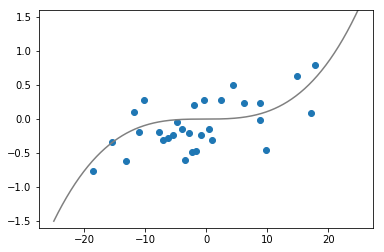

In [50]:
plt.scatter(X, y)
plt.plot(X_plot, y_plot, color='gray')
plt.ylim([-1.6, 1.6])
plt.show()

In [51]:
from sklearn.linear_model import LinearRegression    # 線形回帰のクラス
from sklearn.preprocessing import PolynomialFeatures # 多項式変換のクラス
lr = LinearRegression()                              # 線形回帰のインスタンスを生成
pol = PolynomialFeatures(degree=7)                   # 7次関数用に特徴量を変換するインスタンスを生成
X_pol = pol.fit_transform(X)                         # Xを7次関数用に変換
lr.fit(X_pol, y)                                     # 変換したデータを学習させる
X_plot_pol = pol.fit_transform(X_plot)               # プロット用のデータも同様に変換
y_plot_pol = lr.predict(X_plot_pol)                  # プロット用のデータのyを予測

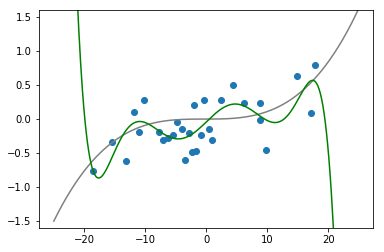

In [52]:
plt.scatter(X, y)                                    # データ点をプロット
plt.plot(X_plot, y_plot, color='gray')               # もととなる三次関数を描画
plt.plot(X_plot, y_plot_pol, color='green')          # 通常の多項式回帰のモデルを描画
plt.ylim([-1.6, 1.6])                                # 縦の表示範囲を指定
plt.show()                                           # グラフを描画

In [68]:
from sklearn.linear_model import Ridge                        # Ridge回帰のクラスを読み込み
model_ridge = Ridge(alpha=1000)                               # Ridge回帰のインスタンスを生成
model_ridge.fit(X_pol, y)                         

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

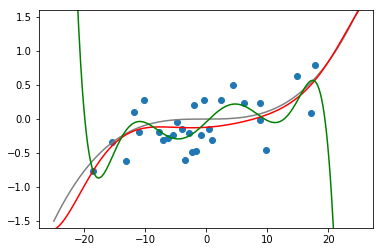

In [69]:
plt.scatter(X, y)
plt.plot(X_plot, y_plot, color='gray')
plt.plot(X_plot, model_ridge.predict(X_plot_pol), color='red')
plt.plot(X_plot, y_plot_pol, color='green')
plt.ylim([-1.6, 1.6])
plt.show()

In [70]:
from numpy import linalg as LA

In [71]:
lr.coef_

array([ 0.00000000e+00,  8.65504973e-02,  4.11571234e-04, -1.64948411e-03,
       -4.05575048e-06,  9.48940782e-06,  5.18992808e-09, -1.49851211e-08])

In [72]:
model_ridge.coef_

array([ 0.00000000e+00,  6.00178293e-03,  1.35634933e-03,  1.14754021e-06,
       -5.17185214e-06,  4.16096324e-07,  5.24302212e-09, -4.29044302e-10])

In [73]:
LA.norm(lr.coef_)

0.08656719288501168

In [74]:
LA.norm(model_ridge.coef_)

0.006153138227687995

In [75]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=1000)
model_lasso.fit(X_pol, y)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

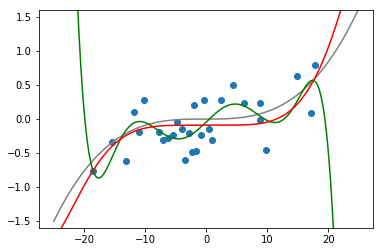

In [77]:
plt.scatter(X, y)
plt.plot(X_plot, y_plot, color='gray')
plt.plot(X_plot, y_plot_pol, color='green')
plt.plot(X_plot, model_lasso.predict(X_plot_pol), color='red')
plt.ylim([-1.6, 1.6])
plt.show()

In [78]:
model_lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.84889999e-07,  2.03058492e-09, -4.20064051e-10])

In [79]:
LA.norm(lr.coef_, ord=1)

0.08862511801157393

In [81]:
LA.norm(model_lasso.coef_, ord=1)

4.873406479230863e-07

In [82]:
LA.norm(model_ridge.coef_, ord=1)

0.007364873417818006

In [83]:
# ElasticNetを実行
from sklearn.linear_model import ElasticNet                 # ElasticNetのクラスを読み込み
model_en= ElasticNet(alpha=1000, l1_ratio=0.9)              # ElasticNetのインスタンスを生成
model_en.fit(X_pol, y)       

ElasticNet(alpha=1000, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

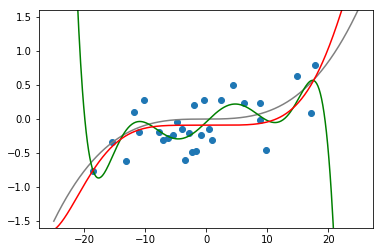

In [86]:
plt.scatter(X, y)                                           # データ点をプロット
plt.plot(X_plot, y_plot, color='gray')                      # もととなる三次関数を描画
plt.plot(X_plot, y_plot_pol, color='green')                 # 通常の多項式回帰によるモデルを描画
plt.plot(X_plot, model_en.predict(X_plot_pol), color='red') # ElasticNetによるモデルを描画
plt.ylim([-1.6, 1.6])                                       # 縦の表示範囲を指定
plt.show()                                                  # グラフを描画

In [92]:
model_en.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.00299266e-07,  1.98532010e-09, -4.68508620e-10])